#Classification with pycaret
This lab asks you to create a classification model on the breast cancer dataset where the targeted class is in the Diagnosis column (M = malignant, B = benign).

* Task 1: Create a machine learning model with py caret on a full set of features to predict the targeted class. (Don't forget to remove the unique ID column.)
* Task 2: Apply any techniques on feature engineering with pycaret to get a model with at least 96% accuracy.

Also shows the confusion matrix and the features important in the experiments.


In [23]:
!pip install pycaret

In [24]:
import pandas as pd
import seaborn as sns
import numpy as np

!gdown 1NNu6rF6AYUXsMlHjApMwGHbT7HxFTu5m
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


df = pd.read_csv("/content/Breast_Cancer_Wisconsin.csv")
df = df.iloc[:,:-1]
print(df.info())
print(df["diagnosis"].value_counts())
df.head()


Downloading...
From: https://drive.google.com/uc?id=1NNu6rF6AYUXsMlHjApMwGHbT7HxFTu5m
To: /content/Breast_Cancer_Wisconsin.csv
100% 125k/125k [00:00<00:00, 18.0MB/s]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Task 1

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Ignore features,1
9,Numeric features,30


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9673,0.0000,0.9673,0.9691,0.9669,0.9287,0.9313,0.1990
ada,Ada Boost Classifier,0.9622,0.0000,0.9622,0.9647,0.9621,0.9187,0.9215,0.1640
lda,Linear Discriminant Analysis,0.9599,0.0000,0.9599,0.9635,0.9589,0.9112,0.9165,0.0650
lightgbm,Light Gradient Boosting Machine,0.9599,0.0000,0.9599,0.9619,0.9594,0.9127,0.9156,2.0500
qda,Quadratic Discriminant Analysis,0.9571,0.0000,0.9571,0.9588,0.9571,0.9080,0.9097,0.0350
gbc,Gradient Boosting Classifier,0.9547,0.0000,0.9547,0.9582,0.9547,0.9033,0.9068,0.4100
rf,Random Forest Classifier,0.9546,0.0000,0.9546,0.9584,0.9547,0.9034,0.9070,0.2140
lr,Logistic Regression,0.9523,0.0000,0.9523,0.9554,0.9517,0.8963,0.9005,0.1750
xgboost,Extreme Gradient Boosting,0.9522,0.0000,0.9522,0.9566,0.9519,0.8970,0.9020,0.0940
ridge,Ridge Classifier,0.9497,0.0000,0.9497,0.9533,0.9487,0.8890,0.8944,0.0350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

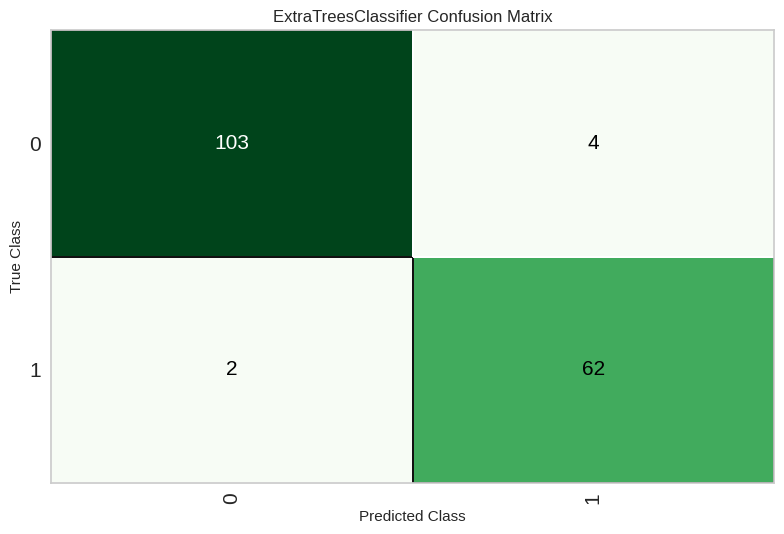

In [32]:
from pycaret.classification import *
clf = ClassificationExperiment()

clf1 = clf.setup(data = df, target = 'diagnosis', session_id = 123,ignore_features=['id'])

best_model = clf1.compare_models(sort='Accuracy')
clf1.plot_model(best_model, plot = 'confusion_matrix')

#Task 2

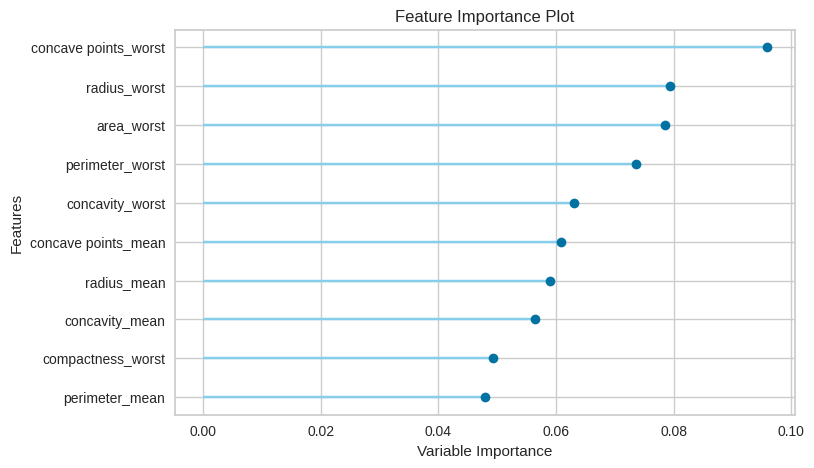

In [33]:
clf1.plot_model(best_model, plot = 'feature')

,Description,Value
0,Session id,122
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(549, 32)"
6,Transformed train set shape,"(378, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,31
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9749,0.0000,0.9749,0.9756,0.9749,0.9463,0.9471,0.1870
knn,K Neighbors Classifier,0.9674,0.0000,0.9674,0.9685,0.9671,0.9291,0.9309,0.2730
et,Extra Trees Classifier,0.9674,0.0000,0.9674,0.9691,0.9671,0.9295,0.9318,0.2880
rf,Random Forest Classifier,0.9599,0.0000,0.9599,0.9631,0.9592,0.9121,0.9166,0.4500
ada,Ada Boost Classifier,0.9599,0.0000,0.9599,0.9609,0.9597,0.9136,0.9150,0.3010
ridge,Ridge Classifier,0.9547,0.0000,0.9547,0.9580,0.9540,0.9003,0.9052,0.1780
lightgbm,Light Gradient Boosting Machine,0.9524,0.0000,0.9524,0.9552,0.9522,0.8978,0.9010,1.6280
svm,SVM - Linear Kernel,0.9498,0.0000,0.9498,0.9512,0.9498,0.8929,0.8942,0.1750
lda,Linear Discriminant Analysis,0.9497,0.0000,0.9497,0.9528,0.9489,0.8894,0.8942,0.2610
xgboost,Extreme Gradient Boosting,0.9449,0.0000,0.9449,0.9467,0.9445,0.8812,0.8836,0.2310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

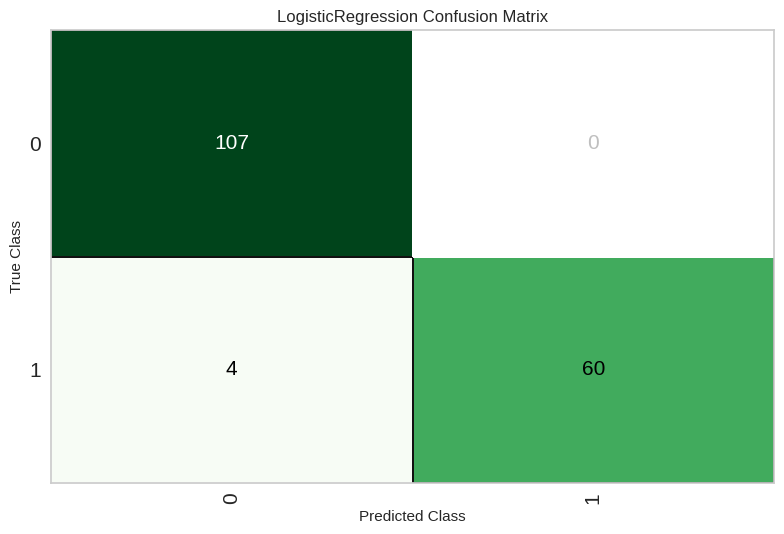

In [38]:
new_data = df.copy()
new_data.drop('diagnosis', axis=1, inplace=True)
predictions = clf1.predict_model(best_model, data = new_data)
s2 = ClassificationExperiment()
s2.setup(df, target = 'diagnosis', session_id = 122,normalize=True,remove_outliers=True)

s2.get_config()
df_transform = s2.get_config('X_train_transformed')
best = s2.compare_models()
s2.plot_model(best, plot = 'confusion_matrix')